*** Cleaning our Data***
- Prepare data for analysis
- Data never comes clean
- Diagnose data for problems

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50.0,1
1,1,85,66.0,29,0,26.6,0.351,31.0,0
2,8,183,64.0,0,0,23.3,0.672,32.0,1
3,1,89,66.0,23,94,28.1,0.167,21.0,0
4,0,137,40.0,35,168,43.1,2.288,33.0,1
5,5,116,74.0,0,0,25.6,0.201,30.0,0
6,3,78,50.0,32,88,31,0.248,26.0,1
7,10,115,0.0,0,0,Nan,0.134,29.0,0
8,2,197,70.0,45,543,30.5,Nan,53.0,1
9,8,125,96.0,0,0,0,0.232,54.0,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null object
Glucose                     766 non-null object
BloodPressure               754 non-null float64
SkinThickness               750 non-null object
Insulin                     767 non-null object
BMI                         749 non-null object
DiabetesPedigreeFunction    767 non-null object
Age                         756 non-null float64
Outcome                     768 non-null int64
dtypes: float64(2), int64(1), object(6)
memory usage: 36.0+ KB


In [3]:
# change our dtype
data = data.astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 767 non-null float64
Glucose                     765 non-null float64
BloodPressure               754 non-null float64
SkinThickness               748 non-null float64
Insulin                     765 non-null float64
BMI                         748 non-null float64
DiabetesPedigreeFunction    765 non-null float64
Age                         756 non-null float64
Outcome                     768 non-null float64
dtypes: float64(9)
memory usage: 54.0 KB


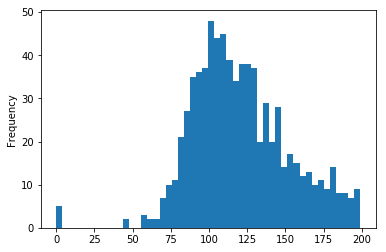

In [5]:
# check for outliers
# using histograms, scatter plot, box plot
import matplotlib.pyplot as plt

data.Glucose.plot('hist', bins = 50)
plt.show()

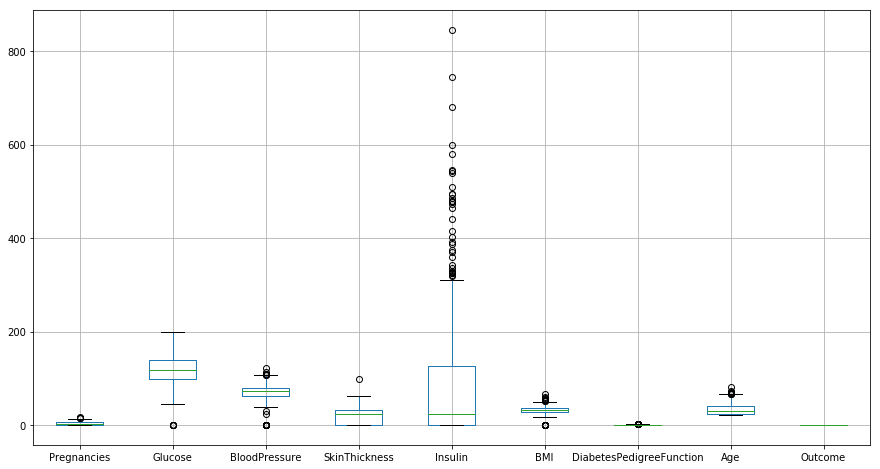

In [6]:
plt.figure(figsize = (15, 8))
data.boxplot()
plt.show()

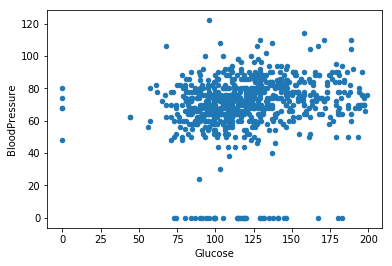

In [7]:
data.plot.scatter('Glucose', 'BloodPressure')
plt.show()

In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125385,0.139982,-0.079371,-0.073129,0.025678,-0.033299,0.544119,0.226140
Glucose,0.125385,1.000000,0.155865,0.070785,0.332409,0.224777,0.138921,0.257863,0.465580
BloodPressure,0.139982,0.155865,1.000000,0.219247,0.094981,0.299468,0.043596,0.235265,0.057848
SkinThickness,-0.079371,0.070785,0.219247,1.000000,0.437107,0.384661,0.185742,-0.110474,0.072683
Insulin,-0.073129,0.332409,0.094981,0.437107,1.000000,0.196214,0.191542,-0.047513,0.128224
BMI,0.025678,0.224777,0.299468,0.384661,0.196214,1.000000,0.141069,0.043822,0.295818
DiabetesPedigreeFunction,-0.033299,0.138921,0.043596,0.185742,0.191542,0.141069,1.000000,0.034767,0.176191
Age,0.544119,0.257863,0.235265,-0.110474,-0.047513,0.043822,0.034767,1.000000,0.233139
Outcome,0.226140,0.465580,0.057848,0.072683,0.128224,0.295818,0.176191,0.233139,1.000000


In [10]:
# drop duplicate data using .drop_duplicates() method
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 765 non-null float64
Glucose                     763 non-null float64
BloodPressure               752 non-null float64
SkinThickness               746 non-null float64
Insulin                     763 non-null float64
BMI                         746 non-null float64
DiabetesPedigreeFunction    763 non-null float64
Age                         754 non-null float64
Outcome                     766 non-null float64
dtypes: float64(9)
memory usage: 59.8 KB


***Missing Data***
- Drop them
- Fill Missing Values

In [14]:
# drop missing values
data_2 = data.dropna()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 693 non-null float64
Glucose                     693 non-null float64
BloodPressure               693 non-null float64
SkinThickness               693 non-null float64
Insulin                     693 non-null float64
BMI                         693 non-null float64
DiabetesPedigreeFunction    693 non-null float64
Age                         693 non-null float64
Outcome                     693 non-null float64
dtypes: float64(9)
memory usage: 54.1 KB


In [15]:
# fill missing values using fillna()
# fill missing values for age column with the mean age value
mean_value = data['Age'].mean()
data['Age'] = data['Age'].fillna(mean_value)

In [16]:
# fill missing values with forward fill
data.fillna(method = 'ffill', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 766 non-null float64
Glucose                     766 non-null float64
BloodPressure               766 non-null float64
SkinThickness               766 non-null float64
Insulin                     766 non-null float64
BMI                         766 non-null float64
DiabetesPedigreeFunction    766 non-null float64
Age                         766 non-null float64
Outcome                     766 non-null float64
dtypes: float64(9)
memory usage: 59.8 KB
